In [457]:
import pandas as pd
import numpy as np

In [458]:
df = pd.read_csv('./train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


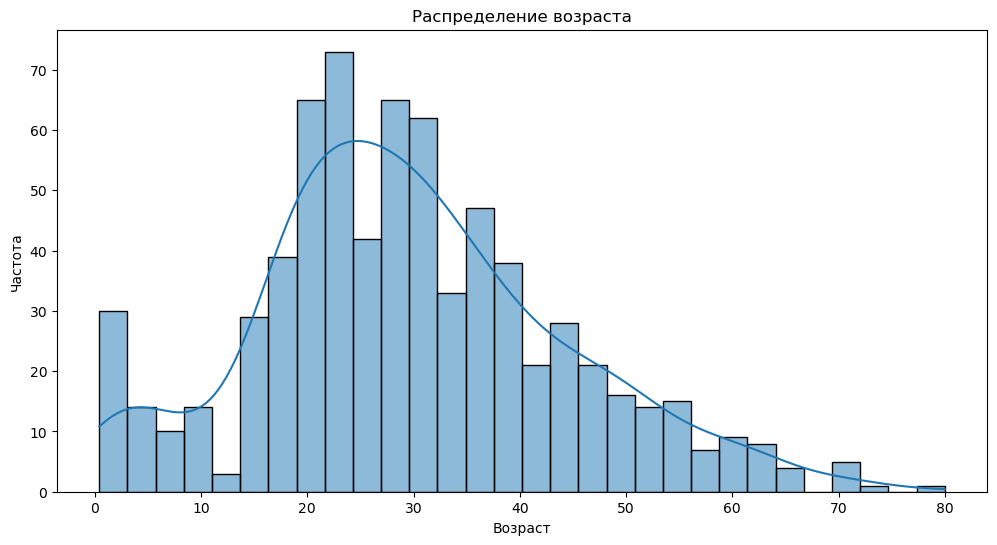

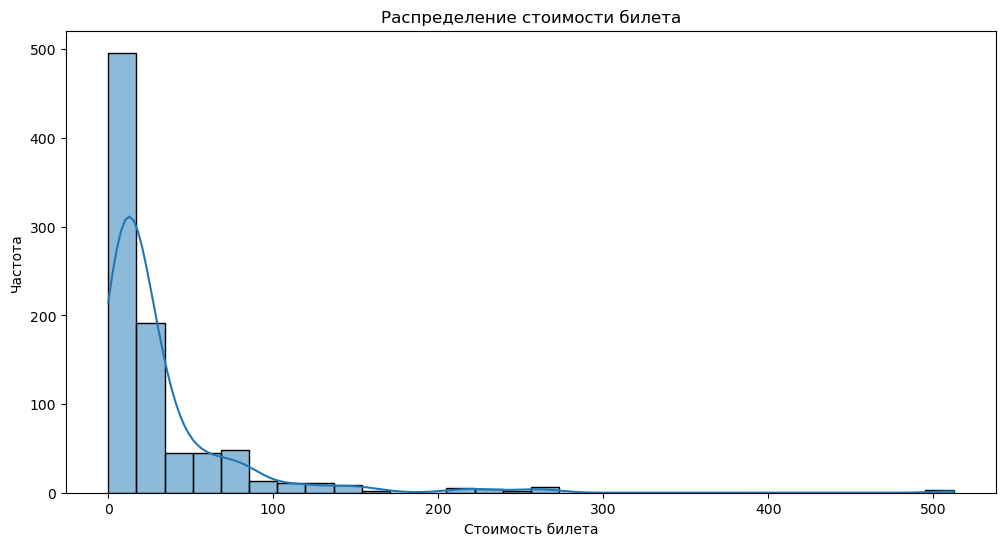

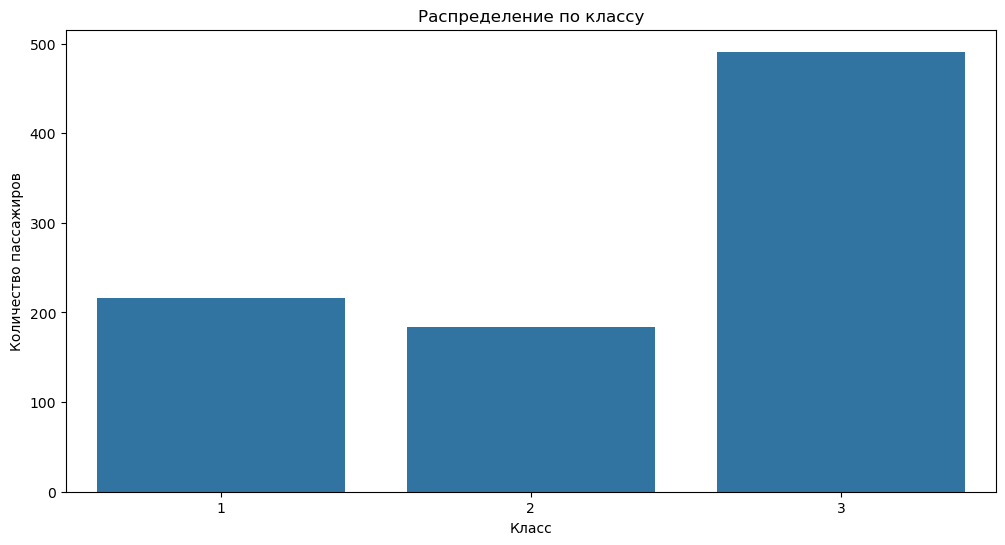

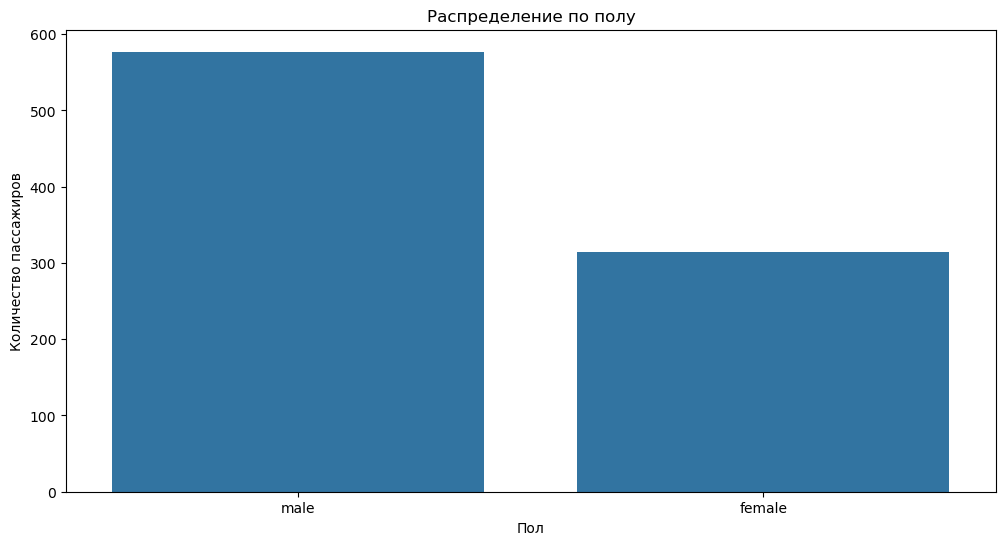

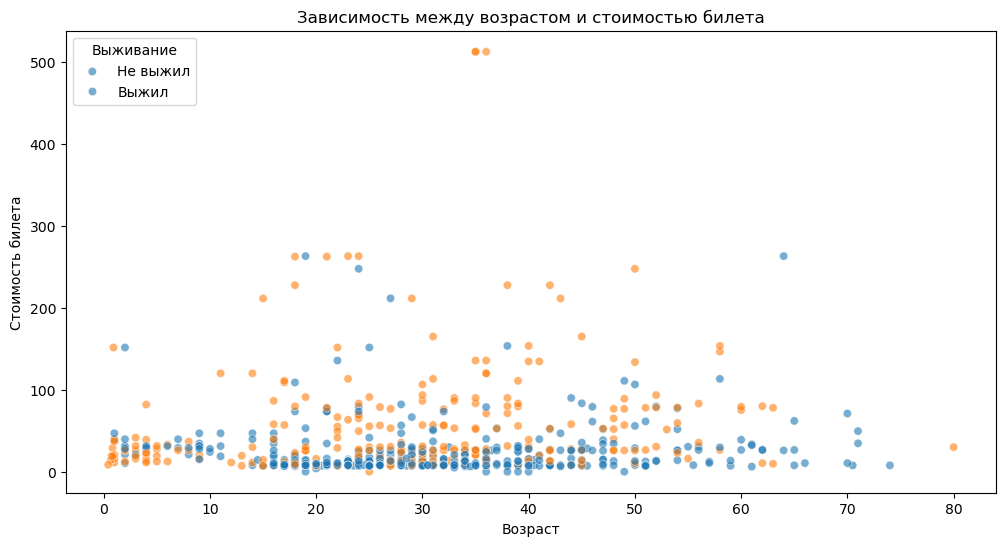

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения возраста

plt.figure(figsize=(12, 6))

sns.histplot(df['Age'], bins=30, kde=True)

plt.title('Распределение возраста')

plt.xlabel('Возраст')

plt.ylabel('Частота')

plt.show()


# Визуализация распределения стоимости билета

plt.figure(figsize=(12, 6))

sns.histplot(df['Fare'], bins=30, kde=True)

plt.title('Распределение стоимости билета')

plt.xlabel('Стоимость билета')

plt.ylabel('Частота')

plt.show()


# Визуализация распределения по классу

plt.figure(figsize=(12, 6))

sns.countplot(x='Pclass', data=df)

plt.title('Распределение по классу')

plt.xlabel('Класс')

plt.ylabel('Количество пассажиров')

plt.show()


# Визуализация распределения по полу

plt.figure(figsize=(12, 6))

sns.countplot(x='Sex', data=df)

plt.title('Распределение по полу')

plt.xlabel('Пол')

plt.ylabel('Количество пассажиров')

plt.show()


# Визуализация зависимости между возрастом и стоимостью билета

plt.figure(figsize=(12, 6))

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)

plt.title('Зависимость между возрастом и стоимостью билета')

plt.xlabel('Возраст')

plt.ylabel('Стоимость билета')

plt.legend(title='Выживание', loc='upper left', labels=['Не выжил', 'Выжил'])

plt.show()

In [460]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch',])  

In [461]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [462]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [463]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
#df['Cabin'] = df['Cabin'].fillna("0").apply(lambda x: x[0])

In [464]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']#, 'Cabin'
target = 'Survived'

In [465]:
df = df.dropna(subset=['Embarked'])

In [466]:
df[cat_cols].isna().sum()

Pclass      0
Sex         0
Embarked    0
dtype: int64

In [467]:
df[num_cols+cat_cols].shape, df[target].shape

((889, 5), (889,))

In [468]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(df[num_cols+cat_cols], df[target], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols)
model.fit(X_train, y_train)

Learning rate set to 0.038962
0:	learn: 0.6763488	total: 1.89ms	remaining: 377ms
1:	learn: 0.6558233	total: 3.65ms	remaining: 362ms
2:	learn: 0.6357076	total: 5.84ms	remaining: 384ms
3:	learn: 0.6175227	total: 8ms	remaining: 392ms
4:	learn: 0.6005413	total: 9.76ms	remaining: 381ms
5:	learn: 0.5825163	total: 12.5ms	remaining: 404ms
6:	learn: 0.5673600	total: 16.4ms	remaining: 453ms
7:	learn: 0.5551688	total: 17.4ms	remaining: 418ms
8:	learn: 0.5488164	total: 18.1ms	remaining: 384ms
9:	learn: 0.5426226	total: 19.1ms	remaining: 363ms
10:	learn: 0.5330966	total: 20.4ms	remaining: 351ms
11:	learn: 0.5199815	total: 22.1ms	remaining: 346ms
12:	learn: 0.5108709	total: 23.1ms	remaining: 333ms
13:	learn: 0.5035258	total: 24ms	remaining: 318ms
14:	learn: 0.4998696	total: 24.6ms	remaining: 304ms
15:	learn: 0.4966072	total: 25.3ms	remaining: 291ms
16:	learn: 0.4884271	total: 26.4ms	remaining: 284ms
17:	learn: 0.4832496	total: 27.2ms	remaining: 275ms
18:	learn: 0.4777549	total: 28.4ms	remaining: 271

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))

accuracy 0.8370786516853933


In [470]:
df[num_cols + cat_cols].head()

,Age,Fare,Pclass,Sex,Embarked
0,22.0,7.2500,3,male,S
1,38.0,71.2833,1,female,C
2,26.0,7.9250,3,female,S
3,35.0,53.1000,1,female,S
4,35.0,8.0500,3,male,S


In [474]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

df = pd.read_csv('./train.csv', sep=',')
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'])
df = df.dropna(subset=['Embarked'])

num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']
target = 'Survived'

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

X_train, X_test, y_train, y_test = train_test_split(df[num_cols + cat_cols], df[target], test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(n_estimators=200, cat_features=[2, 3, 4], verbose=0))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

In [475]:
test = pd.read_csv('./test.csv', sep=',')
id = test['PassengerId']

In [476]:
predict = pipeline.predict(test)
submission = pd.DataFrame({
    'PassengerId': id,
    'Survived': predict
})

submission.to_csv('submission.csv', index=False)